In [5]:
using Catlab
using Catlab.CategoricalAlgebra
using Catlab.WiringDiagrams
using Catlab.Programs
using Catlab.Graphics
using Catlab.Graphics: Graphviz

using AlgebraicDynamics
using AlgebraicDynamics.DWDDynam
using AlgebraicDynamics.UWDDynam
using AlgebraicDynamics.CPortGraphDynam
using AlgebraicDynamics.CPortGraphDynam: grid

using LabelledArrays

using DynamicalSystems, OrdinaryDiffEq
using Plots

# Lotka Volterra

Directed composition

In [56]:
# Pick a composition syntax (expression)

rabbit_fox_syntax = @relation (rabbit,fox) begin
    growth(rabbit)
    predation(rabbit, rabbit)
    decline(fox)
end

ACSet with elements Box = 1:3, Port = 1:4, OuterPort = 1:2, Junction = 1:2
┌─────┬───────────┐
│ Box │      name │
├─────┼───────────┤
│   1 │    growth │
│   2 │ predation │
│   3 │   decline │
└─────┴───────────┘
┌──────┬─────┬──────────┐
│ Port │ box │ junction │
├──────┼─────┼──────────┤
│    1 │   1 │        1 │
│    2 │   2 │        1 │
│    3 │   2 │        1 │
│    4 │   3 │        2 │
└──────┴─────┴──────────┘
┌───────────┬────────────────┐
│ OuterPort │ outer_junction │
├───────────┼────────────────┤
│         1 │              1 │
│         2 │              2 │
└───────────┴────────────────┘
┌──────────┬──────────┐
│ Junction │ variable │
├──────────┼──────────┤
│        1 │   rabbit │
│        2 │      fox │
└──────────┴──────────┘

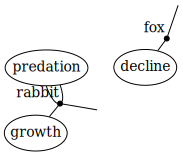

In [8]:
to_graphviz(rabbit_fox_syntax, box_labels=:name, junction_labels=:variable)

In [57]:
# Choose primitive models

growth_model = ContinuousResourceSharer{Float64}(
    1, # number of exposed variables
    2, # number of state variables
    (u, p, t) -> [-p.β*u[1] + u[2], cos(t)], # dynamics (internal)
    [1] # port map (exposed)
)

decline_model = ContinuousResourceSharer{Float64}(
    1, 
    1, 
    (u,p,t) -> -p.δ*u,
    [1]
)

predation_model = ContinuousResourceSharer{Float64}(
    2,
    2,
    (u,p,t) -> [-p.α*u[1]*u[2], p.γ*u[1]*u[2]],
    [1,2]
)

ContinuousResourceSharer(ℝ^2 → ℝ^2) with 2 exposed ports

In [58]:
# Compose!
rabbit_fox = oapply(rabbit_fox_syntax, [growth_model, predation_model, decline_model])

ContinuousResourceSharer(ℝ^3 → ℝ^3) with 2 exposed ports

In [59]:
params = LVector(α=.015, β=0.3, γ=0.015, δ=0.5)
tspan = (0.0, 100.0)
u0 = [10.0, 50.0, 25.0] # initial condition

prob = ODEProblem(rabbit_fox, u0, tspan, params)
plotly()
sol = solve(prob, Tsit5())
plot(sol, lab = ["rabbits" "grass" "foxes"] )

<!DOCTYPE html>
 
 
 Plots.jl

### Task 3

In [60]:
# Pick a composition syntax (expression)

ref_syntax = @relation (rabbit,fox,eagle) begin
    decline(eagle)
    predation_er(rabbit, eagle)
    predation_fr(rabbit, fox)
end

ACSet with elements Box = 1:3, Port = 1:5, OuterPort = 1:3, Junction = 1:3
┌─────┬──────────────┐
│ Box │         name │
├─────┼──────────────┤
│   1 │      decline │
│   2 │ predation_er │
│   3 │ predation_fr │
└─────┴──────────────┘
┌──────┬─────┬──────────┐
│ Port │ box │ junction │
├──────┼─────┼──────────┤
│    1 │   1 │        3 │
│    2 │   2 │        1 │
│    3 │   2 │        3 │
│    4 │   3 │        1 │
│    5 │   3 │        2 │
└──────┴─────┴──────────┘
┌───────────┬────────────────┐
│ OuterPort │ outer_junction │
├───────────┼────────────────┤
│         1 │              1 │
│         2 │              2 │
│         3 │              3 │
└───────────┴────────────────┘
┌──────────┬──────────┐
│ Junction │ variable │
├──────────┼──────────┤
│        1 │   rabbit │
│        2 │      fox │
│        3 │    eagle │
└──────────┴──────────┘

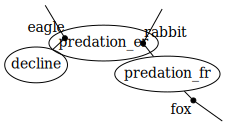

In [61]:
to_graphviz(ref_syntax, box_labels=:name, junction_labels=:variable)

In [63]:
# Choose primitive models

decline_model = ContinuousResourceSharer{Float64}(
    1, # number of exposed variables
    1, # number of state variables
    (u,p,t) -> -p.δ*u, # dynamics (internal)
    [1] # port map (exposed)
)


predation_er = ContinuousResourceSharer{Float64}(
    2,
    2,
    (u,p,t) -> [-p.ϵ*u[1]*u[2], p.ω*u[1]*u[2]],
    [1,2]
)

# predation_fr = ContinuousResourceSharer{Float64}(
#     2,
#     2,
#     (u,p,t) -> [-p.ϵ*u[1]*u[2], p.ω*u[1]*u[2]],
#     [1,2]
# )

ContinuousResourceSharer(ℝ^2 → ℝ^2) with 2 exposed ports

In [64]:
# Compose!
ref = oapply(ref_syntax, [decline_model, predation_er, rabbit_fox])

ContinuousResourceSharer(ℝ^4 → ℝ^4) with 3 exposed ports

In [71]:
params = LVector(α=.015, β=0.3, γ=0.015, δ=0.5, ϵ=0.025, ω=0.75)
tspan = (0.0, 50.0)
u0 = [10.0, 5.0, 2.5, 40.0] # initial condition

prob = ODEProblem(ref, u0, tspan, params)
plotly()
sol = solve(prob, Tsit5())
plot(sol, lab = ["eagles" "rabbit" "grass" "foxes"])

<!DOCTYPE html>
 
 
 Plots.jl